<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/QC_concentration_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [9]:
QC_PUF_150 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_150_concentration_output_2023-11-17.csv', header=1)
QC_PF_152 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_152_concentration_output_2023-11-17.csv', header=1)
QC_Solvent_100_153 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_153_concentration_output_2023-11-17.csv', header=1)
QC_Blank_157 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_157_concentration_output_2023-11-22.csv', header=1)
QC_PUF_159 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_159_concentration_output_2023-11-23.csv', header=1)
QC_PF_161 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_161_concentration_output_2023-11-24.csv', header=1)
QC_PUF_176 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_176_concentration_output_2023-12-01.csv', header=1)
QC_PF_180 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_180_concentration_output_2023-12-01.csv', header=1)
QC_Solvent_30_182 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_182_concentration_output_2023-12-01.csv', header=1)
QC_Blank_83 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_83_concentration_output_2023-12-03.csv', header=1)
QC_Solvent_30_184 = pd.read_csv('/content/drive/My Drive/quantitation_export/Sample_184_concentration_output_2023-12-05.csv', header=1)

QC_PUF_150['Concentration [microg/ml]'] = QC_PUF_150['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_PF_152['Concentration [microg/ml]'] = QC_PF_152['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_Solvent_100_153['Concentration [microg/ml]'] = QC_Solvent_100_153['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_Blank_157['Concentration [microg/ml]'] = QC_Blank_157['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_PUF_159['Concentration [microg/ml]'] = QC_PUF_159['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_PF_161['Concentration [microg/ml]'] = QC_PF_161['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_PUF_176['Concentration [microg/ml]'] = QC_PUF_176['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_PF_180['Concentration [microg/ml]'] = QC_PF_180['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_Solvent_30_182['Concentration [microg/ml]'] = QC_Solvent_30_182['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_Blank_83['Concentration [microg/ml]'] = QC_Blank_83['Concentration [microg/ml]'].apply(lambda x: max(0, x))
QC_Solvent_30_184['Concentration [microg/ml]'] = QC_Solvent_30_184['Concentration [microg/ml]'].apply(lambda x: max(0, x))

QC_PUF_150['Option'] = 'PUF'
QC_PF_152['Option'] = 'PF'
QC_Solvent_100_153['Option'] = 'Solvent'
QC_Blank_157['Option'] = 'Blank'
QC_PUF_159['Option'] = 'PUF'
QC_PF_161['Option'] = 'PF'
QC_PUF_176['Option'] = 'PUF'
QC_PF_180['Option'] = 'PF'
QC_Solvent_30_182['Option'] = 'Solvent'
QC_Blank_83['Option'] = 'Blank'
QC_Solvent_30_184['Option'] = 'Solvent'
print(QC_Blank_157)
print(QC_Solvent_30_182)

                       Analyte  Intercept     Slope     Value  \
0            Dimethylphthalate   0.001358  0.356679  0.003132   
1             Diethylphthalate   0.001323  0.387867  0.018446   
2             Dibutylphthalate   0.002397  0.656251  0.054844   
3         Benzylbutylphthalate  -0.000574  0.273788  0.002564   
4  Bis(2-ethyl-hexyl)phthalate  -0.001668  0.450815  0.445631   
5          Di-n-octylphthalate  -0.006264  0.490070  0.003014   

   Concentration [microg/ml] Option  
0                   0.002475  Blank  
1                   0.008478  Blank  
2                   0.038388  Blank  
3                   0.000128  Blank  
4                   0.199230  Blank  
5                   0.000000  Blank  
                       Analyte  Intercept     Slope     Value  \
0            Dimethylphthalate   0.001358  0.356679  0.000339   
1             Diethylphthalate   0.001323  0.387867  0.002176   
2             Dibutylphthalate   0.002397  0.656251  0.024321   
3         Benzylbu

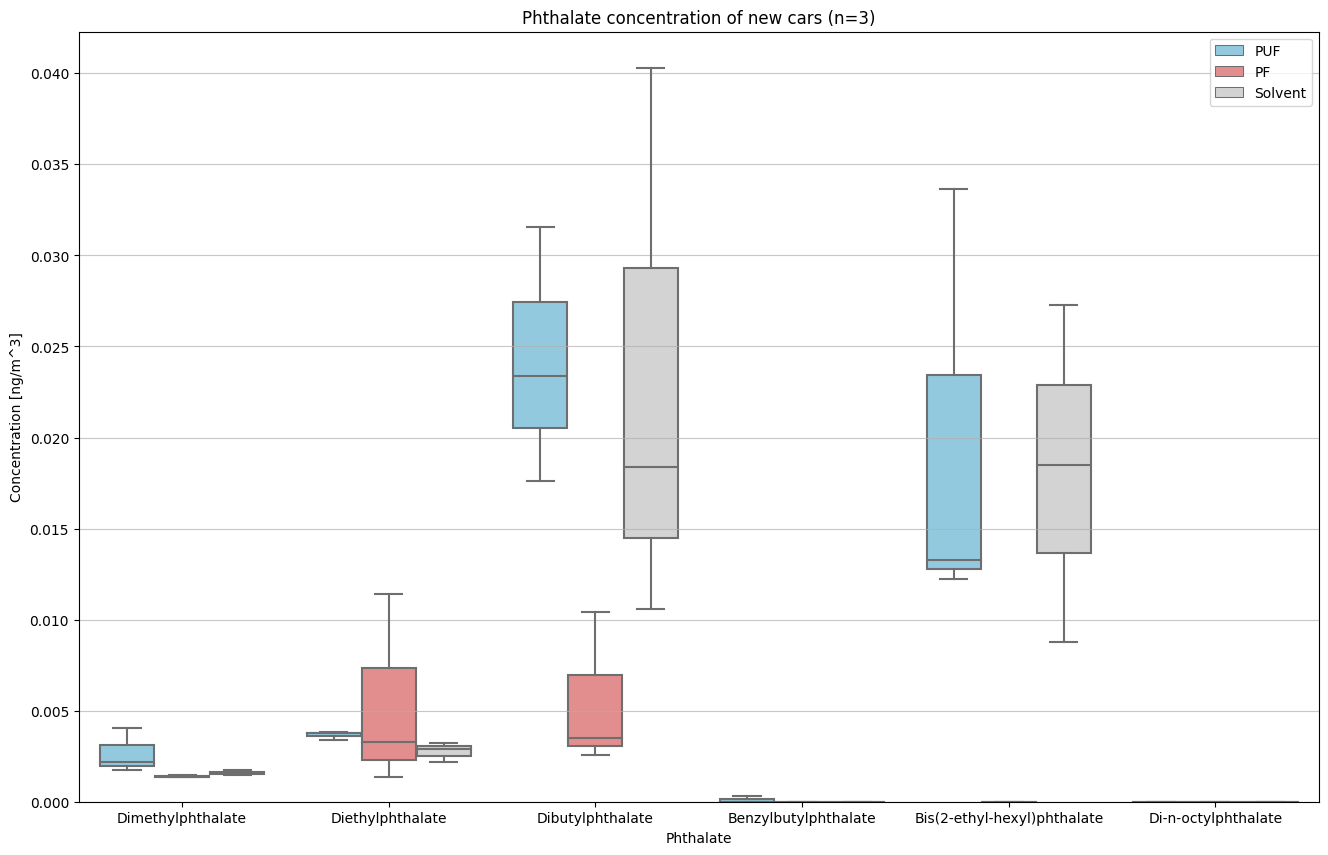

In [10]:
df_combined = pd.concat([QC_PUF_150, QC_PF_152, QC_Solvent_100_153, QC_PUF_159, QC_PF_161, QC_PUF_176, QC_PF_180, QC_Solvent_30_182, QC_Solvent_30_184])

# Map unique 'Phthalat:' values to numerical values
phthalate_mapping = {phthalate: i for i, phthalate in enumerate(df_combined['Analyte'].unique())}

# Add a new column 'PhthalateNumeric' to the DataFrame based on the mapping
df_combined['PhthalateNumeric'] = df_combined['Analyte'].map(phthalate_mapping)

means = df_combined.groupby(['PhthalateNumeric', 'Option'])['Concentration [microg/ml]'].mean().reset_index()


plt.figure(figsize=(16, 10))

ax = sns.boxplot(x='PhthalateNumeric', y='Concentration [microg/ml]', hue='Option', data=df_combined, palette={'PUF': 'skyblue', 'PF': 'lightcoral', 'Solvent': 'lightgray'}, showfliers=True)

#sns.swarmplot(x='PhthalateNumeric', y='Concentration [microg/ml]', hue='Option', data=df_combined, palette={'PUF': 'skyblue', 'PF': 'lightcoral', 'Solvent': 'lightgray'}, size=5, dodge=True, edgecolor='black', linewidth=0.5)

plt.title('Phthalate concentration of new cars (n=3)')
plt.xlabel('Phthalate')
plt.ylabel('Concentration [ng/m^3]')
plt.xticks(ticks=range(len(phthalate_mapping)), labels=df_combined['Analyte'].unique())
plt.legend(loc='upper right')
plt.grid(True, axis='y', alpha=0.7)
plt.ylim(bottom=0)
plt.show()

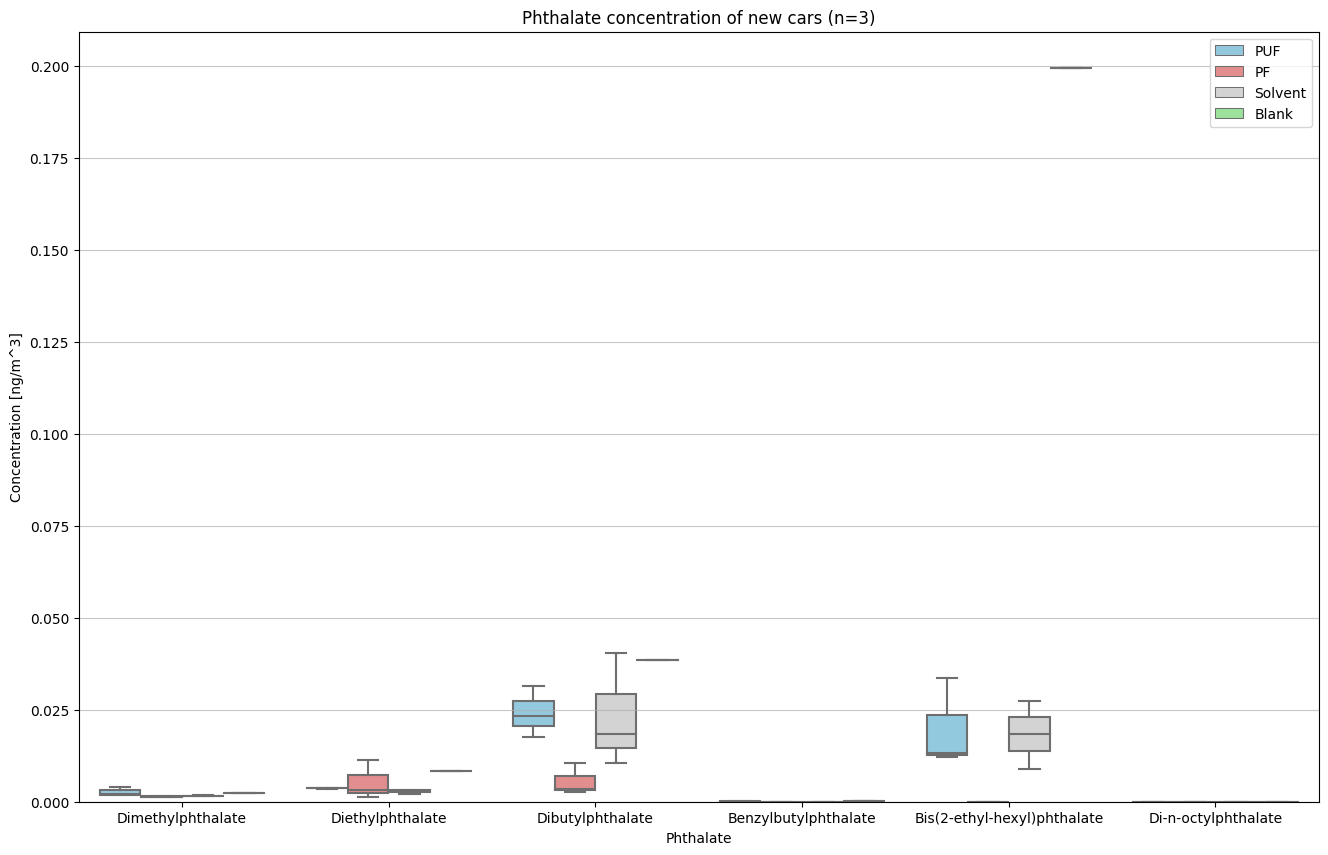

In [11]:
df_combined = pd.concat([QC_PUF_150, QC_PF_152, QC_PUF_159, QC_PF_161, QC_PUF_176, QC_PF_180, QC_Solvent_30_182, QC_Solvent_100_153, QC_Blank_157, QC_Solvent_30_184])

# Map unique 'Phthalat:' values to numerical values
phthalate_mapping = {phthalate: i for i, phthalate in enumerate(df_combined['Analyte'].unique())}

# Add a new column 'PhthalateNumeric' to the DataFrame based on the mapping
df_combined['PhthalateNumeric'] = df_combined['Analyte'].map(phthalate_mapping)

means = df_combined.groupby(['PhthalateNumeric', 'Option'])['Concentration [microg/ml]'].mean().reset_index()


plt.figure(figsize=(16, 10))

ax = sns.boxplot(x='PhthalateNumeric', y='Concentration [microg/ml]', hue='Option', data=df_combined, palette={'PUF': 'skyblue', 'PF': 'lightcoral', 'Solvent': 'lightgray', 'Blank': 'lightgreen'}, showfliers=True)

#sns.swarmplot(x='PhthalateNumeric', y='Concentration [microg/ml]', hue='Option', data=df_combined, palette={'PUF': 'skyblue', 'PF': 'lightcoral', 'Solvent': 'lightgray'}, size=5, dodge=True, edgecolor='black', linewidth=0.5)

plt.title('Phthalate concentration of new cars (n=3)')
plt.xlabel('Phthalate')
plt.ylabel('Concentration [ng/m^3]')
plt.xticks(ticks=range(len(phthalate_mapping)), labels=df_combined['Analyte'].unique())
plt.legend(loc='upper right')
plt.grid(True, axis='y', alpha=0.7)
plt.ylim(bottom=0)
plt.show()